In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

Load Fashion-MNIST dataset

In [7]:
transform = transforms.ToTensor()

In [8]:
train_dataset = datasets.FashionMNIST(root = './data',train = True,transform=transform,download=True)

In [9]:
train_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)

Build Autoencoder Model

In [10]:
class AutoEncoder(nn.Module):
  def __init__(self):
    super(AutoEncoder,self).__init__()

    self.encoder = nn.Sequential(nn.Flatten(),
                                 nn.Linear(28*28,256),
                                 nn.ReLU(),
                                 nn.Linear(256,64),
                                 nn.ReLU(),
                                 nn.Linear(64,16)
                                 )

    self.decoder = nn.Sequential(nn.Linear(16,64),
                                 nn.ReLU(),
                                 nn.Linear(64,256),
                                 nn.ReLU(),
                                 nn.Linear(256,28*28),
                                 nn.Sigmoid()
                                 )
  def forward(self,x):
    z = self.encoder(x)
    x_hat = self.decoder(z)
    return x_hat

In [11]:
model = AutoEncoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr = 0.001)

In [12]:
epochs = 10

for epoch in range(epochs):
    for images, _ in train_loader:
        # Forward
        outputs = model(images)
        loss = criterion(outputs, images.view(images.size(0), -1))

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [1/10], Loss: 0.0219
Epoch [2/10], Loss: 0.0144
Epoch [3/10], Loss: 0.0123
Epoch [4/10], Loss: 0.0132
Epoch [5/10], Loss: 0.0139
Epoch [6/10], Loss: 0.0120
Epoch [7/10], Loss: 0.0128
Epoch [8/10], Loss: 0.0100
Epoch [9/10], Loss: 0.0136
Epoch [10/10], Loss: 0.0128


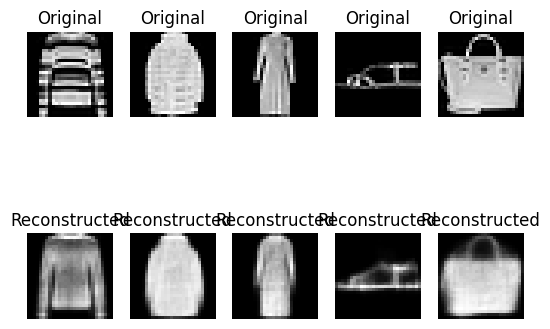

In [13]:
import matplotlib.pyplot as plt

images, _ = next(iter(train_loader))
output = model(images).view(-1, 1, 28, 28).detach()

# show first 5 images
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title("Original")
    plt.axis('off')

for i in range(5):
    plt.subplot(2,5,i+6)
    plt.imshow(output[i].squeeze(), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()


In [15]:
torch.save(model.encoder.state_dict(), "encoder.pth")
torch.save(model.decoder.state_dict(), "decoder.pth")